*Experience complete functionality (both sync and async) for a single prompt and list of images.
*Seamlessly handle multiple chat messages through our chat function (both sync and async).
*Realize dynamic, real-time streaming of completion outputs with our stream complete feature (both sync and async).
*Facilitate live streaming of chat interactions through our stream chat capability (both sync and async)

**Use Gemini to understand Images from URLs**

In [33]:


!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

In [2]:
%env GOOGLE_API_KEY=...

env: GOOGLE_API_KEY=...


In [60]:
import os

GOOGLE_API_KEY = ""  # add your GOOGLE API key here
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

 **Initialize GeminiMultiModal and Load Images from URLs**

In [32]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal
from llama_index.multi_modal_llms.generic_utils import load_image_urls
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

image_urls = [
    "https://drive.google.com/uc?export=download&id=1nf1jgWYPWOgH_0-AA8I4fVy0ZLv4V6C0",
    # Add yours here!
]

image_documents = load_image_urls(image_urls)
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")


https://drive.google.com/uc?export=download&id=1nf1jgWYPWOgH_0-AA8I4fVy0ZLv4V6C0


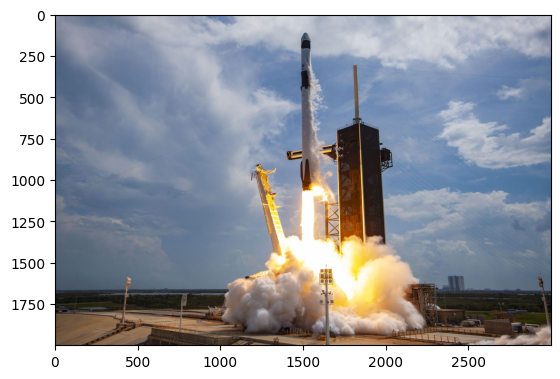

In [5]:
img_response = requests.get(image_urls[0])
print(image_urls[0])

# Check if the request was successful
if img_response.status_code == 200:
    img = Image.open(BytesIO(img_response.content))
    plt.imshow(img)
    plt.show()
else:
    print("Failed to download the image.")


In [6]:
complete_response = gemini_pro.complete(
    prompt="Identify the rocket name.",
    image_documents=image_documents,
)

In [ ]:
print(complete_response)

 The rocket is a Falcon 9.


In [ ]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="Give me more context for this image",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.text, end="")

 This is a photo of a SpaceX Falcon 9 rocket launching from the Kennedy Space Center in Florida. The rocket is carrying a Dragon capsule with four astronauts on board. The astronauts are part of the Crew-1 mission, which is the first crewed flight of the Falcon 9 rocket. The mission is scheduled to arrive at the International Space Station on November 16, 2020.

In [9]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="tell me the history about this rocket",
    image_documents=image_documents,
)

In [10]:
for r in stream_complete_response:
    print(r.text, end="")

 The Falcon 9 is a two-stage rocket designed and manufactured by SpaceX for the reliable and cost-effective launch of payloads into Earth orbit and beyond. It is the first orbital rocket capable of reflight, and the first to successfully reuse its first stage. The Falcon 9 has been used to launch a variety of payloads, including satellites, the Dragon spacecraft, and the Crew Dragon spacecraft.

The Falcon 9 was developed in the early 2000s by SpaceX, a private space exploration company founded by Elon Musk. The rocket was designed to be reusable, which would significantly reduce the cost of space launch. The Falcon 9 first launched in 2010, and it has since become one of the most reliable rockets in the world.

The Falcon 9 is a two-stage rocket. The first stage is powered by nine Merlin engines, which burn kerosene and liquid oxygen. The second stage is powered by a single Merlin engine, which also burns kerosene and liquid oxygen. The first stage of the Falcon 9 is reusable, and it 

In [13]:
response_acomplete = gemini_pro.acomplete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)


In [18]:
print(response_acomplete)

<coroutine object GeminiMultiModal.acomplete at 0x7dbe65853a70>


**Complete with Two images**

In [50]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal
from llama_index.multi_modal_llms.generic_utils import load_image_urls

# Image URLs (Google Drive links)
image_urls = [
    "https://drive.google.com/uc?export=download&id=1jiJ5Msr8MWrY6vuW5WwkVOUXsTf3Ufr9",
    "https://drive.google.com/uc?export=download&id=10TWjHvJPwwotM3rvbZ6eyWmKunh3EQPD",
]

# Load images using PIL
image_documents = load_image_urls(image_urls)

# Instantiate GeminiMultiModal
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")


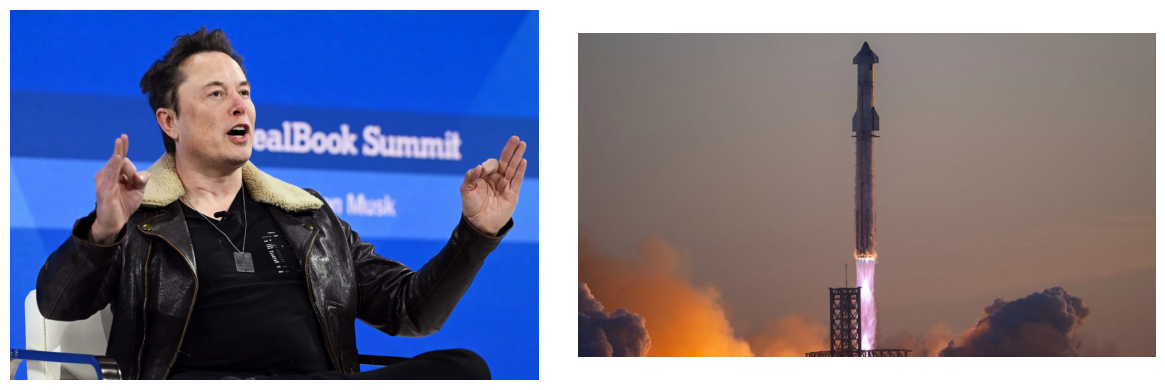

In [55]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Create a subplot with the number of columns equal to the number of images
num_images = len(image_urls)
fig, axes = plt.subplots(1, num_images, figsize=(12, 4))  # Adjust the figsize as needed

# Set spacing between subplots
fig.subplots_adjust(wspace=0.3)  # Adjust the spacing as needed

# Download and display each image side by side
for i, (image_url, ax) in enumerate(zip(image_urls, axes)):
    img_response = requests.get(image_url)
    print(f"Downloading and displaying image {i + 1}")

    # Check if the request was successful
    if img_response.status_code == 200:
        img = Image.open(BytesIO(img_response.content))
        ax.imshow(img)
        ax.axis("off")  # Turn off axis labels
    else:
        print(f"Failed to download image {i + 1}. Status code: {img_response.status_code}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [59]:
# Perform multimodal completion
image_documents_1 = load_image_urls(image_urls)
response_multi = gemini_pro.complete(
    prompt="Is there any relationship between those images and describe the story between them?",
    image_documents=image_documents_1,
)

# Print the response
print(response_multi)


 The relationship between the two images is that the first image shows Elon Musk, the CEO of SpaceX, and the second image shows a SpaceX rocket launching into space. The story between the two images is that Elon Musk is the founder and CEO of SpaceX, a company that designs, manufactures, and launches rockets and spacecraft. SpaceX has been contracted by NASA to launch cargo and astronauts to the International Space Station. The company is also developing a new rocket called the Starship, which is designed to carry humans and cargo to Mars.
